In [1]:
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 21000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'dataset/testing_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 4000 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3 , activation = 'relu' , input_shape = [64,64,3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3 , activation = 'relu' , input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3 , activation = 'relu' , input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [13]:
history = cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [15]:
history = cnn.fit(x = train_generator,validation_data=validation_generator, epochs =5)

Epoch 1/5
657/657 [==============================] - 80s 114ms/step - loss: 0.6335 - accuracy: 0.6308 - val_loss: 0.5687 - val_accuracy: 0.6977
Epoch 2/5
657/657 [==============================] - 59s 90ms/step - loss: 0.5350 - accuracy: 0.7303 - val_loss: 0.4910 - val_accuracy: 0.7642
Epoch 3/5
657/657 [==============================] - 64s 97ms/step - loss: 0.4803 - accuracy: 0.7688 - val_loss: 0.4510 - val_accuracy: 0.7915
Epoch 4/5
657/657 [==============================] - 58s 88ms/step - loss: 0.4478 - accuracy: 0.7921 - val_loss: 0.4472 - val_accuracy: 0.8005
Epoch 5/5
657/657 [==============================] - 57s 87ms/step - loss: 0.4238 - accuracy: 0.8045 - val_loss: 0.4166 - val_accuracy: 0.8100


In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("dataset/training_set/cats/cat.303.jpg", target_size=[64,64,3])
test_image= image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else :
    prediction = 'cat'

In [17]:
prediction

'cat'

In [18]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


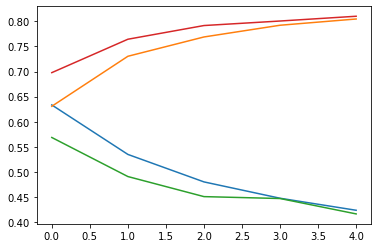

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])